# Assignment 

### Name: Anushk Naval  
### Roll:18046

**Write a program in MATLAB or python to solve the 1-D steady-state flow in a confined aquifer using Laplace equation with boundary conditions.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

By laplace equation for steady state flow,<br>
$$\frac{\partial^{2}{h}}{\partial{x}^{2}}+\frac{\partial^{2}{h}}{\partial{y}^{2}} + \frac{\partial^{2}{h}}{\partial{x}^{2}}=0 $$<br>
as we are looking for 1-D steady state flow therefore,<br>
$\frac{\partial^{2}{h}}{\partial{y}}=0$ and $\frac{\partial^{2}{h}}{\partial{z}^{2}}=0$<br>
giving $$\frac{\partial^{2}{h}}{\partial{x}^{2}}=0$$

On integration with respect to x twice,<br>
$${h}_{(x)} = C_{1}x +C_{2}$$

Using the boundary conditions are:<br>
 at x = 0, $h = h_{1}$ hence, $C_{2} = h_{1}$<br>
 at x = L, $h = h_{2}$ hence, $C_{1} = \frac{h_{2}-h_{1}}{L}$<br>

Putting value we get the eqution of piezometeric surface:<br>
$${h}_{(x)} = \frac{h_{2}-h_{1}}{L}x +h_{1} $$

In [2]:
def h(x):
    return ((h2 - h1)*x/l + h1)

In [3]:
print("Enter height of well 1:")
h1 = int(input())
print("Enter height of well 2:")
h2 = int(input())
print("Enter the distance between the wells")
l = int(input())

Enter height of well 1:
50
Enter height of well 2:
47
Enter the distance between the wells
1200


In [4]:
xs = np.linspace(0,l,1000)
ys = h(xs)

In [5]:
# By odeint:

def model(h,x):
    dhdx = (h2-h1)/l
    return dhdx

x0 = h1
t = np.linspace(0,l,1000)
h = odeint(model, x0,t)

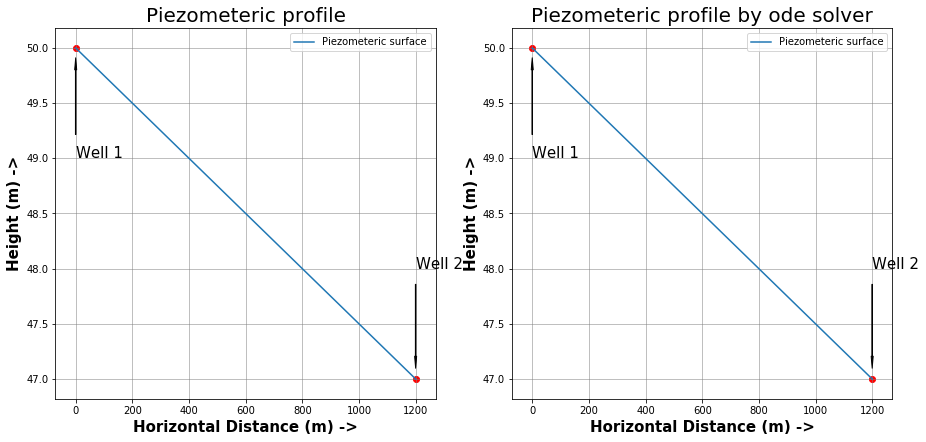

In [6]:
plt.figure(figsize=(15,15))
arrow_properties = dict(facecolor="black", width=0.5,headwidth=2, shrink=0.1)

plt.subplot(221)
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.plot(xs,ys,label = 'Piezometeric surface')
plt.xlabel("Horizontal Distance (m) ->", fontsize=15, fontweight='bold' ,)
plt.ylabel("Height (m) ->", fontsize=15, fontweight='bold')
plt.title('Piezometeric profile', fontsize=20)
plt.legend()

# Annotates:
plt.scatter(xs[0], ys[0],color='red')
plt.scatter(xs[-1], ys[-1],color='red')
plt.annotate('Well 1',fontsize=15, xy = (xs[0], ys[0]),xytext=(xs[0], ys[0]-1),
             arrowprops=arrow_properties)
plt.annotate('Well 2',fontsize=15, xy = (xs[-1], ys[-1]),xytext=(xs[-1], ys[-1] +1),
             arrowprops=arrow_properties)

plt.subplot(222)
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.plot(t,h,label = 'Piezometeric surface')
plt.xlabel("Horizontal Distance (m) ->", fontsize=15, fontweight='bold' ,)
plt.ylabel("Height (m) ->", fontsize=15, fontweight='bold')
plt.title('Piezometeric profile by ode solver', fontsize=20)
plt.legend()

# Annotates:
plt.scatter(xs[0], ys[0],color='red')
plt.scatter(xs[-1], ys[-1],color='red')
plt.annotate('Well 1',fontsize=15, xy = (xs[0], ys[0]),xytext=(xs[0], ys[0]-1),
             arrowprops=arrow_properties)
plt.annotate('Well 2',fontsize=15, xy = (xs[-1], ys[-1]),xytext=(xs[-1], ys[-1] +1),
             arrowprops=arrow_properties)

plt.show()